In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

In [2]:
df_128 = pd.read_csv('/content/drive/MyDrive/Proyecto Cultivos/deepglobe/df_labeled-128.csv').dropna()

In [ ]:
# Ploteo imagen
def display_image_with_mask(image_path, mask_path):
    image = Image.open(image_path)
    mask = Image.open(mask_path)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Imagen')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Máscara')
    plt.axis('off')

    plt.show()


In [4]:
df_128.tail(10)

,image_name,label
289873,998002_sat_tile_9_17.jpg,agriculture_land
289874,998002_sat_tile_9_18.jpg,agriculture_land
289875,998002_sat_tile_9_2.jpg,rangeland
289876,998002_sat_tile_9_3.jpg,rangeland
289877,998002_sat_tile_9_4.jpg,rangeland
289878,998002_sat_tile_9_5.jpg,rangeland
289879,998002_sat_tile_9_6.jpg,rangeland
289880,998002_sat_tile_9_7.jpg,rangeland
289881,998002_sat_tile_9_8.jpg,rangeland
289882,998002_sat_tile_9_9.jpg,rangeland


In [27]:
# Conteo de muestras por clase

unique_classes = df_128['label'].unique()

class_counts = {}

for class_name in unique_classes:
    count = (df_128['label'] == class_name).sum()
    class_counts[class_name] = count

print("\nConteo de muestras por clase:")
for class_name, count in class_counts.items():
    print(f"Clase: {class_name}, {count} muestras")


Conteo de muestras por clase:
Clase: agriculture_land, 168810 muestras
Clase: rangeland, 23832 muestras
Clase: urban_land, 30475 muestras
Clase: barren_land, 25103 muestras
Clase: forest_land, 32724 muestras
Clase: water, 8786 muestras
Clase: unknown, 153 muestras


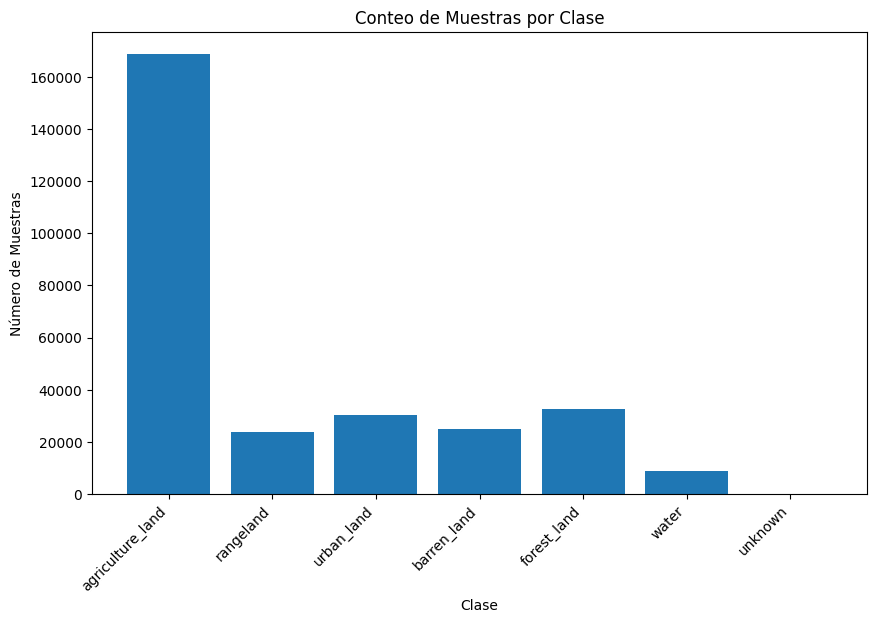

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Clase')
plt.ylabel('Número de Muestras')
plt.title('Conteo de Muestras por Clase')
plt.xticks(rotation=45, ha='right')
plt.show()

Al haber asignado a cada imagen su clase mayoritaria, el dataset está muy desbalanceado. Observemos qué es la clase unknown en especial. En el caso del modelo binario, no será una situación tan preocupante, pero en el caso del modelo multiclase, sí habrá que tomar ciertas medidas para balancear los datos.

In [8]:
image_path ='/content/drive/MyDrive/Proyecto Cultivos/deepglobe/tiles-128/'

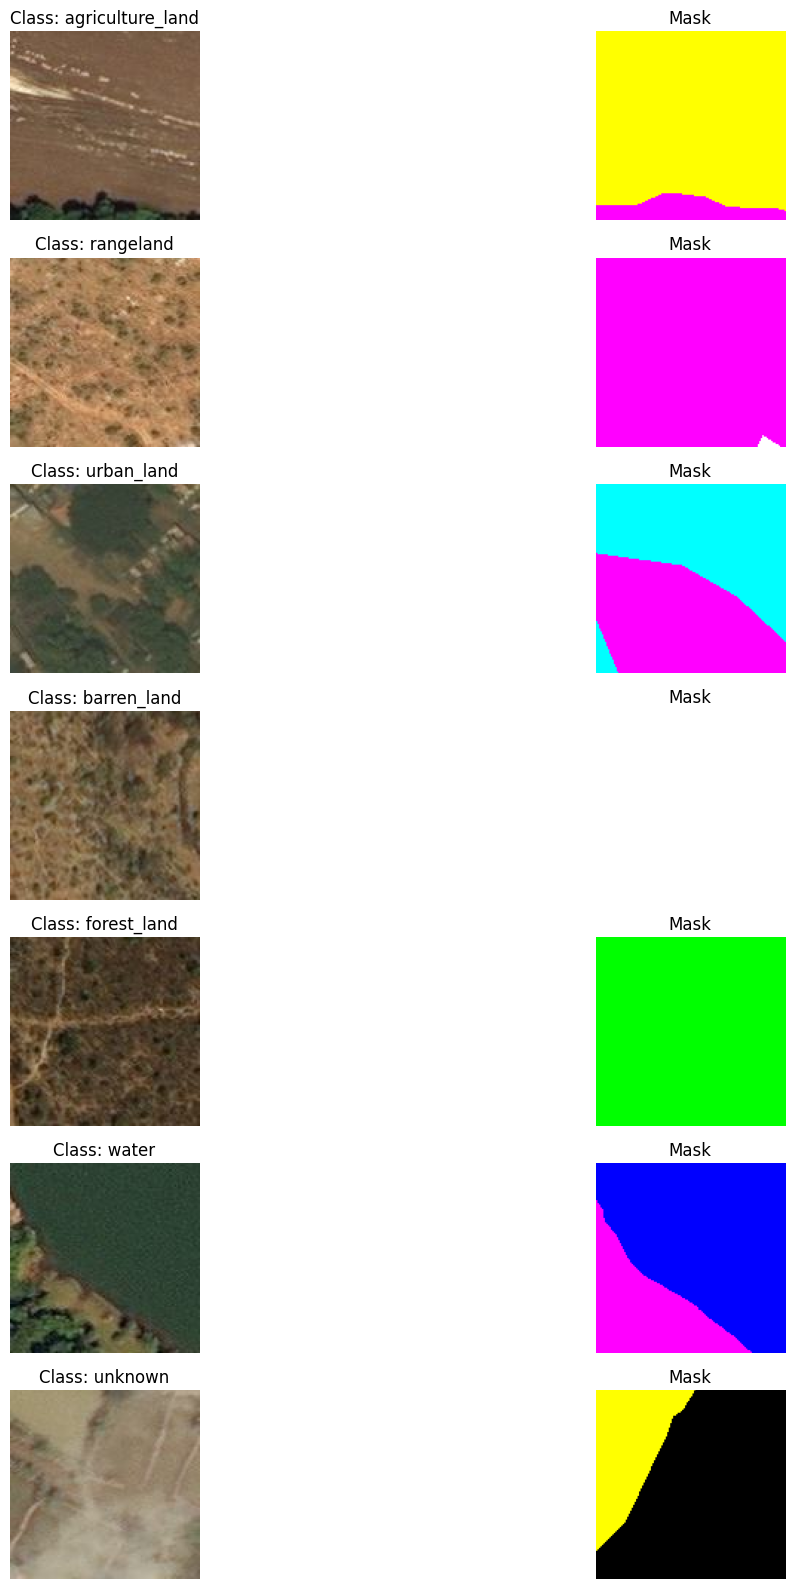

In [26]:
num_rows = len(unique_classes)
num_cols = 2  # 2 columns for each image and its mask

# Create a figure for displaying the images and masks
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))

for idx, class_name in enumerate(unique_classes):
    # Filter rows for the current class
    samples_for_class = df_128[df_128['label'] == class_name]

    # Select a random sample for the class
    while True:
        random_sample = random.choice(samples_for_class.index)
        row = df_128.loc[random_sample]
        image_filename = row['image_name']
        mask_filename = image_filename.replace("_sat", "_mask").replace("jpg", "png")
        image_tile_path = os.path.join(image_path, image_filename)
        mask_tile_path = os.path.join(image_path, mask_filename)

        # Check if the image and mask files exist
        if os.path.exists(image_tile_path) and os.path.exists(mask_tile_path):
            break

    # Load and display the image and mask in the grid
    row_index = idx
    col_index = 0
    axs[row_index, col_index].imshow(Image.open(image_tile_path))
    axs[row_index, col_index].set_title(f'Class: {class_name}')
    axs[row_index, col_index].axis('off')

    col_index = 1
    axs[row_index, col_index].imshow(Image.open(mask_tile_path), cmap='gray')
    axs[row_index, col_index].set_title('Mask')
    axs[row_index, col_index].axis('off')

# Remove any empty subplots
for i in range(len(unique_classes), num_rows):
    for j in range(num_cols):
        fig.delaxes(axs[i, j])

# Adjust the layout and spacing
plt.tight_layout()
plt.show()






Tras realizar unas cuantas pruebas, parece que está funcionando bien el etiquetado. Además, la clase unknown se refiere a imágenes que tienen nubes, por lo que será una clase que podemos eliminar al ser muy minoritaria y al poder controlar esto en la visualización de imágenes por satélite.